#   

# <center> <font color = green > Bank Data Analytics </font>   </center> 


#  

#  



### <center> Summary </center>
<br/>
<br/>
<br/>
<br/>

### <center> Bank Data Analysis Report  </center> 
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to __identify the segments based on credit card usage.__
<br/>
<br/>


### <center> <font color = blue >Questions</font>   </center> 

<br/>
<br/>

1.1 Read the data and do exploratory data analysis. Describe the data briefly.
<br/>
<br/>

1.2  Do you think scaling is necessary for clustering in this case? Justify
<br/>
<br/>

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.
<br/>
<br/>

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.
<br/>
<br/>

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

<br/>
<br/>
<br/>
<br/>
<br/>






### <center> Data Dictionary for the Banking Dataset </center>

<br/>
<br/>
<br/>
<br/>

__spending__  :  Amount spent by the customer per month (in 1000s)
<br/>
<br/>

__advance_payments__  :  Amount paid by the customer in advance by cash (in 100s)
<br/>
<br/>

__probability_of_full_payment__  :   Probability of payment done in full by the customer to the bank
<br/>
<br/>

__current_balance__  :  Balance amount left in the account to make purchases (in 1000s)
<br/>
<br/>

__credit_limit__  :  Limit of the amount in credit card (10000s)
<br/>
<br/>

__min_payment_amt__   :  minimum paid by the customer while making payments for purchases made monthly (in 100s)
<br/>
<br/>

__max_spent_in_single_shopping__   :  Maximum amount spent in one purchase (in 1000s)
<br/>
<br/>
<br/>
<br/>

***

<br />
<br />
<br />
<br />

# <center> Preliminary Analysis of the Dataset </center>  

<br />
<br />

In [1]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns 

sns.set(color_codes = True)


<br/>
<br/>

### Q) 1.1 Read the data and do exploratory data analysis. Describe the data briefly.
<br/>
<br/>

In [2]:
bm_df = pd.read_csv("D:\\New Download - 2019\\Great Learning 2020\\Data Sets\\Bank_Marketing.csv")




In [3]:
bm_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [4]:
bm_df.shape

(210, 7)

In [5]:
bm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [7]:
bm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
bm_df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
bm_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [10]:
bm_df.duplicated().sum()

0

<br />


## <font color = green > Obervation :- </font>

<br />

### 210 - Rows and  7 - Columns

<br />
<br />

### The Data types of all the Columns are same - `float64` 

<br />
<br />

### All the columns have 210 entries.  

<br />
<br />

###  `isnull` & `isna` - the intent here is to check for any Missing values, Null 

### Values or Not a Number Values(NaN) in the Dataset. 

###  Null values or NaN values for all the Columns have " 0 " has output.

### No missing values, Null or Garbage values. 
<br />
<br />


### `'0' or NO` duplicates in our Dataset.

<br />
<br />


###  Above assesment denotes our Dataset is Clean.   

<br />
<br />
<br />
<br />

<br/>
<br/>

### Further exploring the variation in the Data

<br/>
<br/>

In [11]:
bm_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

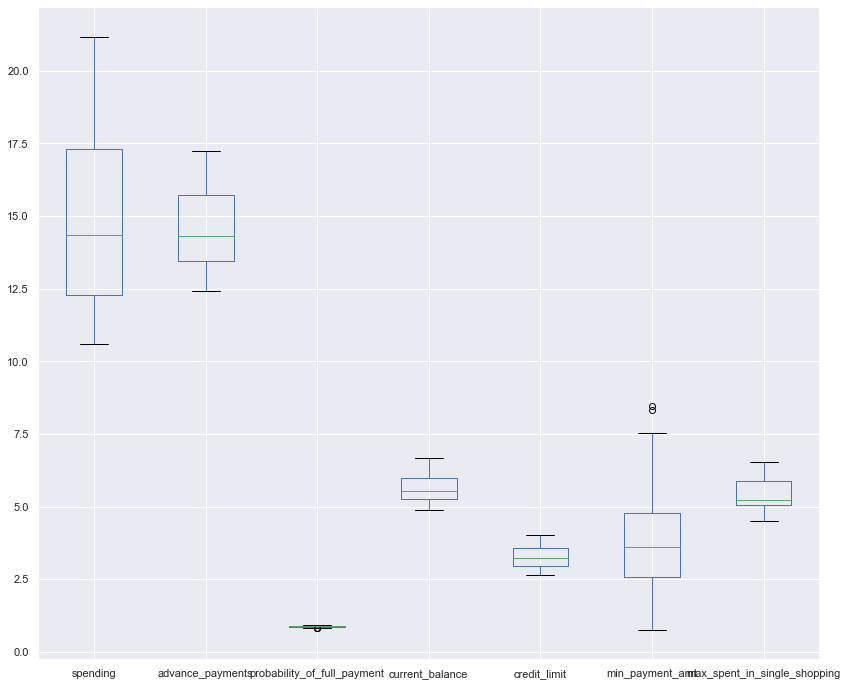

In [12]:
plt.figure(figsize=(14,12))

bm_df.boxplot()

### Based on the above graph. We will select and re-plot the columns which have similar 

### numerical variation so that their variation can be appropriately seen in the graph.  

<br>
<br>

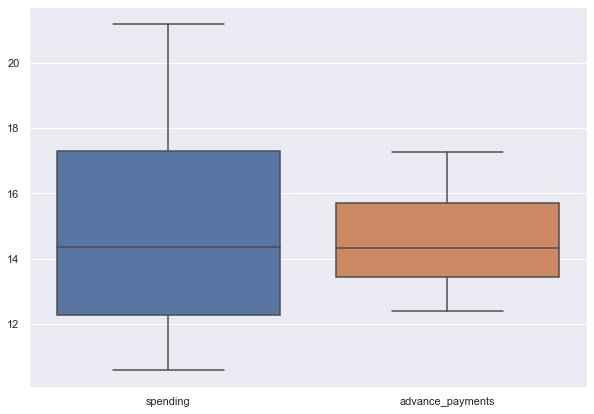

In [13]:
plt.figure(figsize=(10,7))

sns.boxplot(data = bm_df[['spending', 'advance_payments']]); 

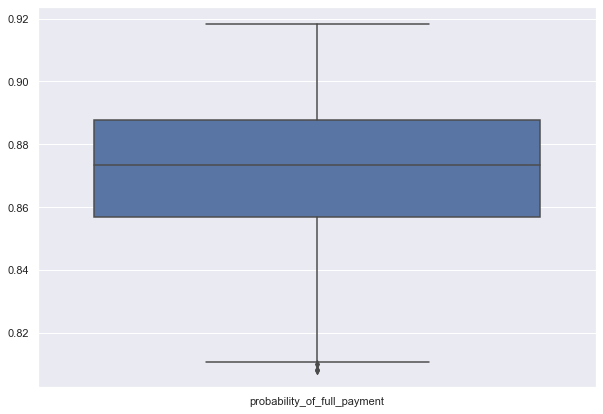

In [14]:
plt.figure(figsize=(10,7))

sns.boxplot(data = bm_df[['probability_of_full_payment']]); 

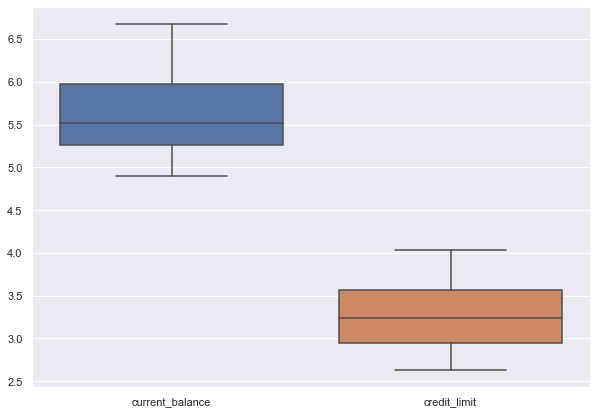

In [15]:
plt.figure(figsize=(10,7))

sns.boxplot(data = bm_df[['current_balance', 'credit_limit']]); 

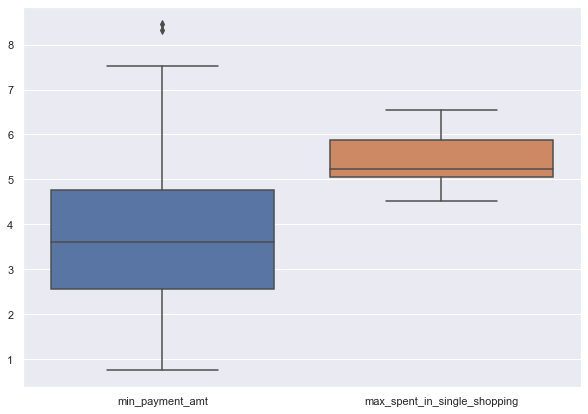

In [16]:
plt.figure(figsize=(10,7))

sns.boxplot(data = bm_df[['min_payment_amt','max_spent_in_single_shopping']]); 

<br />


## <font color = green > Obervation :- </font>

<br />
<br />


### `Spending` and `Advance_payments` are plotted on the 1st graph. 

<br />

### `Spending` - from the above graph what we are able to infer is that the number of people who are High spenders are more than the Low or Moderate spenders.     

<br />

### `Advance_payments` - below the median we get to see a nice symmetry of Data. Above the median we can see that there is a longer stretch. 

### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  Higher value payments(Rupees) being made by people are more in number than vice -versa.

<br />
<br />
<br />
<br />


### `Probability_of_full_payment`  -  A very good symmetric graph with a small number of Outliers on the Lower side. This is indicative of the presence of a small number of people whose chances of paying back the Credit amount is belived to be very less.   

<br />
<br />
<br />
<br />


### `Current_balance` - It starts at a High value close to 5 and ends near to 7(in 1000s).  Within this range what we can infer is that there comparitively Higher number people who have more balance that they can use for their purchases. 

### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The <font color = green > effective use of this very Credit balance </font> could be the reason why the Bank might be looking for segmentation and then marketing to their customers.  

<br />
<br />
<br />
<br />


### `Credit_limit` - a symmetrical representation of the Credit limit of the customers.  

<br />
<br />
<br />
<br />


### `Min_payment_amt` - from the median to the Maximum(Q3+1.5IQR) there is a long stretch and there are also Outliers present in the Higher side of the distribution. 


### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; This is indicative that there more number of people who make <font color = green > High value purchase </font>  from their credit cards.  

<br />
<br />
<br />
<br />


### `Max_spent_in_single_shopping` - number of people who spend more than 5000 in a single purchase using their Credit card is High.


<br />
<br />
<br />
<br />



### Overall for the present customer base the credit usuage is more comparitiverly for High Value purchases. The Probability_of_full_payment is good for <font color = green > most customers.</font>

### The Credit Limit being good for the cutomers a certain Credit balance is being left out at the end of every month. This gives a scope that based on <font color = green > trageted offers the customer might want to spend more on certain products.</font>     




<br />
<br />
<br />
<br />

***

<br/>
<br/>

## Q) 1.2  Do you think scaling is necessary for clustering in this case? Justify
<br/>
<br/>


### Let, us start by viewing our Data distribution across the columns. 

In [17]:
bm_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


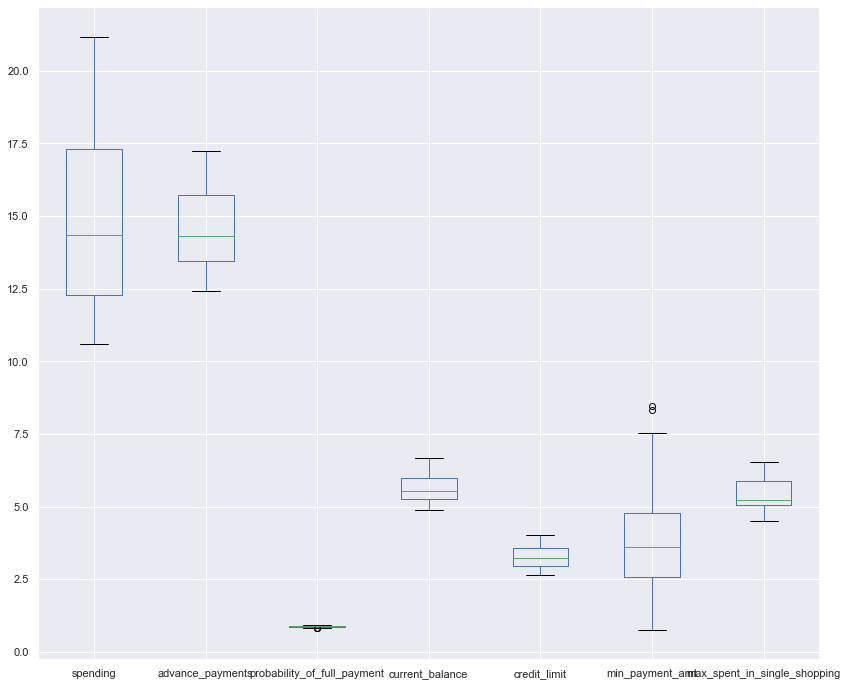

In [18]:
plt.figure(figsize=(14,12))

bm_df.boxplot()

<br />


### <font color = green > Answer :- </font> Based on the observations listed below, I would suggest that scalling is needed for our Dataset. 

<br />
<br />


### Firstly, in the Data dictionary we see that there are `3` different denominations for the columns that are depicting monetary transactions which are - 100s, 1000s and 10,000s. 


### The scales are different here amongst the columns.  



<br />
<br />
<br />
<br />



### Probability column(Probability_of_full_payment) is not directly indicative of a monetary transaction but it is also belongs to a different scale.   


<br />
<br />
<br />
<br />



### When we do the Boxplot of the entire Data we see that certain columns enjoying a good distribution and the others are squezed or are not well represented. Overall these aspects put togethere indicate that Scaling is important for our Dataset. 



<br />
<br />
<br />
<br />



***

<br/>
<br/>

## Q) 1.3 Apply hierarchical clustering to scaled data.

## Identify the number of optimum clusters using Dendrogram and briefly describe them. 
<br/>
<br/>

<br/>

### Answer :- Before Scaling our Data set, it is essential that we first treat the Outliers that is present in our Data. 

### As the presence of Outliers might impact the Scaling of our Dataset. 

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Outlier Treatment 

In [83]:
Q1 = bm_df.quantile(0.25)
Q3 = bm_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

spending                        5.035000
advance_payments                2.265000
probability_of_full_payment     0.030875
current_balance                 0.717500
credit_limit                    0.617750
min_payment_amt                 2.207250
max_spent_in_single_shopping    0.832000
sil_width                       0.203905
Cluster_3                       2.000000
dtype: float64


In [84]:


# Replace every outlier on the lower side by the lower whisker

for i, j in zip(np.where(bm_df < Q1 - 1.5 * IQR)[0], np.where(bm_df < Q1 - 1.5 * IQR)[1]):
    whisker  = Q1 - 1.5 * IQR
    bm_df.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    

for i, j in zip(np.where(bm_df > Q3 + 1.5 * IQR)[0], np.where(bm_df > Q3 + 1.5 * IQR)[1]):
    whisker  = Q3 + 1.5 * IQR
    bm_df.iloc[i,j] = whisker[j]
    

<br/>
<br/>
<br/>
<br/>

In [85]:
bm_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Cluster_3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0.620332,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0.079450,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0.694597,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0.487571,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0.536113,0


<br/>

### We have treated the Outliers, lets now re-check the Data using Boxplots.

<br/>

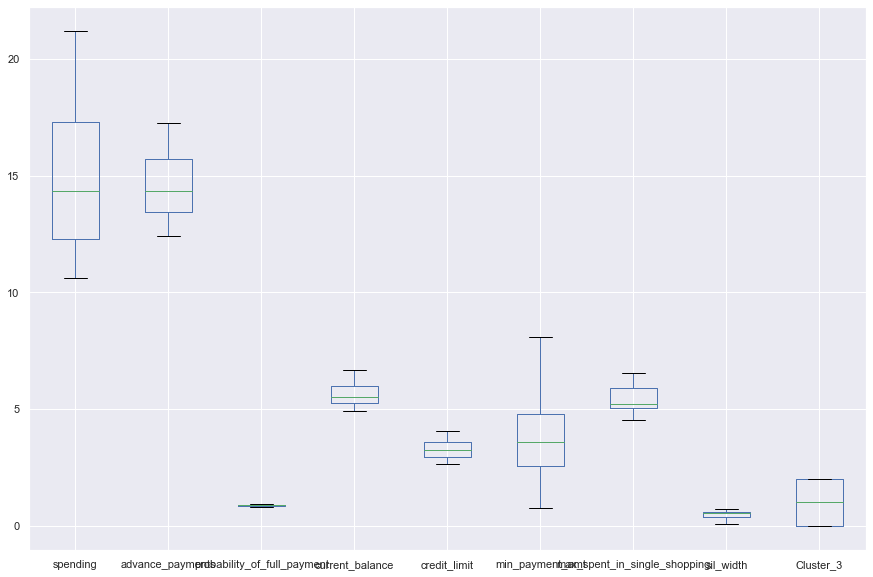

In [87]:
plt.figure(figsize=(15,10))

bm_df.boxplot()

<br/>
<br/>

### From, the above Box Plot graphs we can note that the Outliers have been treated.  

<br/>

### Now, proceeding with the Scaling of the Dataset

In [88]:
SS = StandardScaler()

In [89]:
scaled_bm_df = SS.fit_transform(bm_df)

<br/>

### Scaled Data

<br/>

In [90]:
scaled_bm_df

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  2.3289982 ,
         0.92888232, -1.25743199],
       [ 0.39358228,  0.25383997,  1.50507052, ..., -0.53858174,
        -2.40254284,  1.21042518],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.50910692,
         1.38629595, -1.25743199],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.83023461,
        -0.2575876 ,  1.21042518],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.07123789,
        -1.94405465,  1.21042518],
       [ 0.24889256,  0.45340314, -0.77966228, ...,  0.96047321,
        -2.40254284,  1.21042518]])

### We now have the Scaled Dataset in array format. 

<br/>

### Hierarchical clustering



<br/>


### Here, we are using <font color = green > Dendogram </font> method to identify the correct cluster number. 

<br/>

In [91]:
bm_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'sil_width', 'Cluster_3'],
      dtype='object')

In [92]:
columns = bm_df.columns

In [93]:
scaled_bm_df_1 = pd.DataFrame(data = scaled_bm_df,columns = bm_df.columns)

<br/>

### Scaled Dataset

<br/>

In [94]:
scaled_bm_df_1.head(10) 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Cluster_3
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,0.928882,-1.257432
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,-2.402543,1.210425
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,1.386296,-1.257432
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,0.111172,-0.023503
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,0.410154,-1.257432
5,-0.739821,-0.882135,0.696692,-1.007977,-0.444794,2.938945,-0.832274,-0.862625,-0.023503
6,-0.974080,-0.943539,-0.881773,-0.630155,-1.190520,0.384751,-0.204099,0.660516,-0.023503
7,-0.381541,-0.390903,0.143591,-0.331518,-0.383756,-0.513228,-1.189192,0.276599,1.210425
8,1.144591,1.305384,-0.311654,1.453520,0.672468,-0.566208,1.764048,0.749506,-1.257432
9,-1.246235,-1.288937,-0.847736,-1.105261,-1.230328,0.420965,-0.826156,0.841191,-0.023503


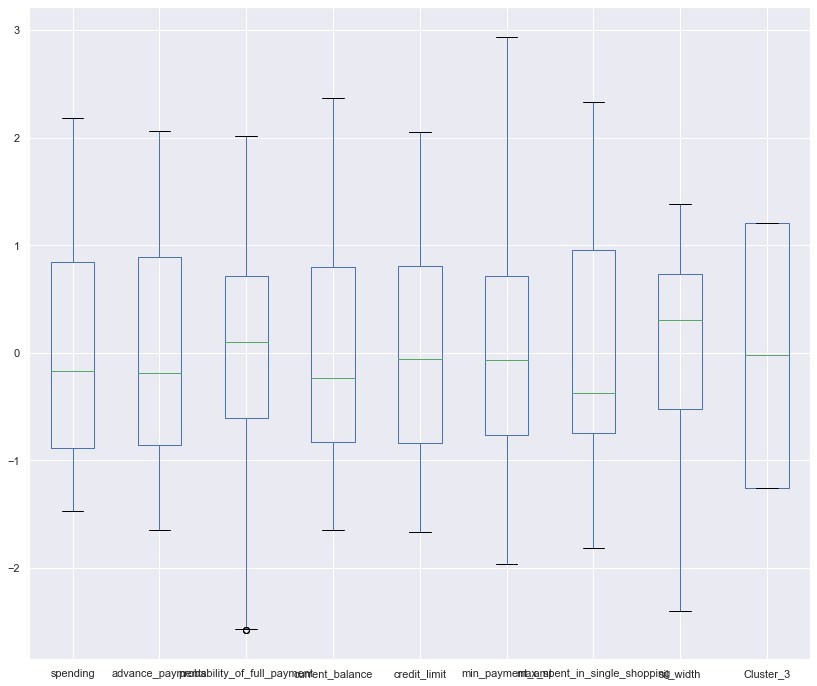

In [95]:
plt.figure(figsize=(14,12))

scaled_bm_df_1.boxplot()

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage


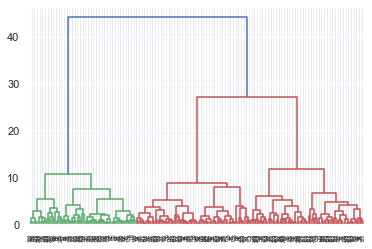

In [97]:
wardlink = linkage(scaled_bm_df_1, method = 'ward')

dend = dendrogram(wardlink)

<br/>

### Here, we can see that there are 2 different colours. 

### This represents that there are <font color = green > 2 distinct clusters </font>   in our Dataset.  

### Going by the Dendogram we are therefore choosing 2 clusters for are further analysis. 

<br/>

In [98]:
from scipy.cluster.hierarchy import fcluster


clusters = fcluster(wardlink, 2, criterion='maxclust')

clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2], dtype=int32)

In [99]:
bm_df['Clusters'] = clusters

bm_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Cluster_3,Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,0.620332,0,1
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,0.079450,2,2
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,0.694597,0,1
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,0.487571,1,2
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,0.536113,0,1
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,0.329468,1,2
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,0.576761,1,2
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,0.514429,2,2
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,0.591209,0,1
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,0.606095,1,2


### To further assess we will keep the Clusters as X-axis and the other columns as the Y-axis 

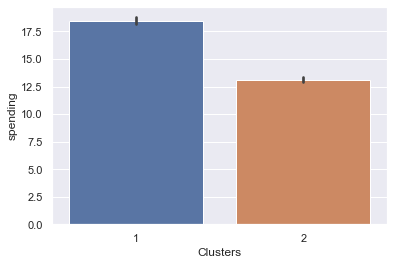

In [100]:
sns.barplot(bm_df["Clusters"],bm_df["spending"] );

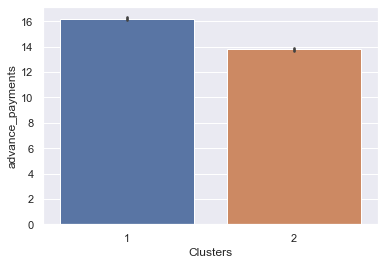

In [101]:
sns.barplot(bm_df["Clusters"],bm_df["advance_payments"] );

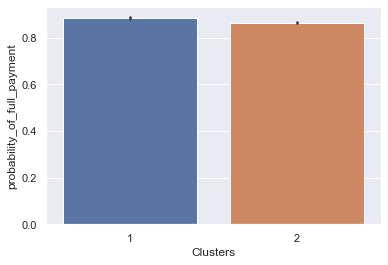

In [102]:
sns.barplot(bm_df["Clusters"],bm_df["probability_of_full_payment"] );

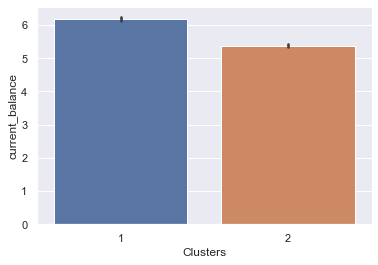

In [103]:
sns.barplot(bm_df["Clusters"],bm_df["current_balance"] );

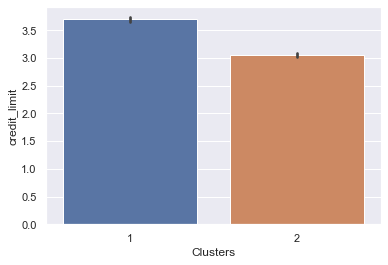

In [104]:
sns.barplot(bm_df["Clusters"],bm_df["credit_limit"] );

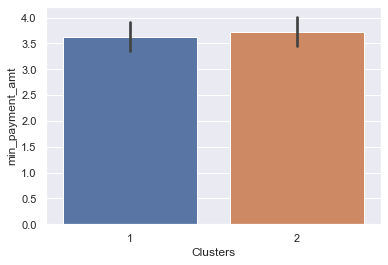

In [105]:
sns.barplot(bm_df["Clusters"],bm_df["min_payment_amt"] );

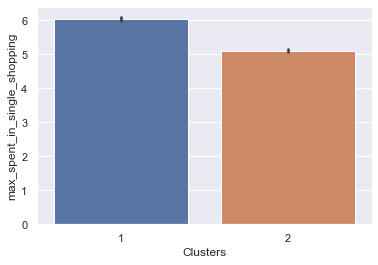

In [106]:
sns.barplot(bm_df["Clusters"],bm_df["max_spent_in_single_shopping"] );

<br />


## <font color = green > Obervation :- </font>

<br />
<br />



### `Spending` - It is very evident that customers in cluster 1 spend more than customers in cluster 2. 


<br />
<br />
<br />
<br />

### `Advance_payments` - being made as well is the number is Higher in case of customers in cluster 1 than for customers in cluster 2.   

<br />
<br />
<br />
<br />


### `Probability_of_full_payment`  -  is High for both the clusters and small point to note. 


### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; We have noted that <font color = green > Cluster 1 </font>  has customers which are <font color = green > High Value Spenders </font>  even then the probability of payment is Higher for cluster 1 when compared to cluster 2.


### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Considering we are hoping to do segmented marketing on Clusters this above insight is a postive indicator to our efforts.  


### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The reason for saying this is because this ensures safety and gurantee to the Bank that the customer although is spending High they will eventually <font color = green > re-pay the amount. </font> 

<br />
<br />
<br />
<br />


### `Current_balance` - is Higher for cluster 1. This indicates that there is room for more purchase that is possible for the customers of both the clusters.    


### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; This again validates the marketing effort that the Bank has planned <font color = green > to foster better utilization of the Credit Card for its customers. </font>   


<br />
<br />
<br />
<br />


### `Credit_limit` -   is Higher for customers that belong to cluster 1.

<br />
<br />
<br />
<br />


### `Min_payment_amt` - is similar for customers that belong to both the clusters.

<br />
<br />
<br />
<br />


### `Max_spent_in_single_shopping` - is Higher for customers that belong to cluster 1.


<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />


***

<br/>
<br/>

### Q) 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. 

### Apply elbow curve and silhouette score.

<br/>
<br/>

<br/>

### Answer :  Here, we are using <font color = green > WSS </font>  method to identify the correct cluster number. 

<br/>

We are performing this step to cross-check the output we received from the Dendogram. Based on the Dendogram we have 2 clusters the green and the pink cluster.

<br/>

The pink cluster has we can see is further divided into 2 clusters. Therefore, since I am not very confident as to how many clusters are appropriate for this situation. I would like to further perform one more method to gain clarity into this situation. 

<br/>

In [107]:
K_means = KMeans(n_clusters = 1) 
K_means.fit(scaled_bm_df)
K_means.inertia_


1890.0000000000002

In [108]:
K_means = KMeans(n_clusters = 2) 
K_means.fit(scaled_bm_df)
K_means.inertia_


911.0675993387579

In [109]:
K_means = KMeans(n_clusters = 3) 
K_means.fit(scaled_bm_df)
K_means.inertia_

542.6353886333252

In [110]:
K_means = KMeans(n_clusters = 4) 
K_means.fit(scaled_bm_df)
K_means.inertia_

456.6080053161611

In [111]:
K_means = KMeans(n_clusters = 5) 
K_means.fit(scaled_bm_df)
K_means.inertia_

398.9485480728519

In [112]:
K_means = KMeans(n_clusters = 6) 
K_means.fit(scaled_bm_df)
K_means.inertia_

356.07818394483496

In [113]:
430.6589731513006 - 371.5811909715524



59.07778217974817

### This means its `not` a very significant drop from Cluster 3 to Cluster 4.

### Let, us now visualize to confirm the same. 

In [114]:
wss_scores = []

In [115]:
for i in range(1,10):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_bm_df)
    wss_scores.append(KM.inertia_)

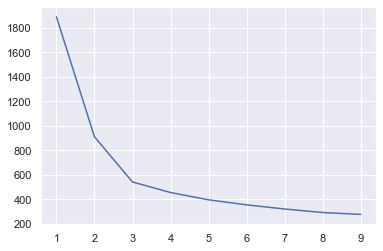

In [116]:
plt.plot(range(1,10), wss_scores)

### The drop is is quite significant till `2`. 

### From `2` to `3` as well there is a good drop.

### After 3 we can see that the drops are not so significant. 

### We will therefore be going with <font color = green > 3 clusters </font> for the Dataset and see if there is any intresting insights that we can gather.  

<br/>
<br/>

In [117]:

from sklearn.metrics import silhouette_samples, silhouette_score


In [118]:

silhouette_score(scaled_bm_df,clusters)


0.4851906940665777

In [119]:

sil_width = silhouette_samples(scaled_bm_df,clusters)

bm_df["sil_width"] = sil_width


In [120]:
bm_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Cluster_3,Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0.645659,0,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0.244306,2,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0.698174,0,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0.471315,1,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0.567650,0,1


In [121]:

silhouette_score(scaled_bm_df,clusters)


0.4851906940665777

In [122]:
silhouette_samples(scaled_bm_df,clusters).max()


0.6981741887445203

In [123]:
silhouette_samples(scaled_bm_df,clusters).min()


0.08454997796547574

### The minimum score is negative for 2 clusters. 

<br/>

### Let, us drop the previous Cluster column(2 clusters).  

### The cummulative score for 2 clusters is - `0.6946`

<br/>

In [124]:
bm_df.drop(['Clusters'], axis=1,inplace=True)

In [125]:
bm_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Cluster_3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0.645659,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0.244306,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0.698174,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0.471315,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0.567650,0


In [126]:

K_means = KMeans(n_clusters = 3) 
K_means.fit(scaled_bm_df)
labels = K_means.labels_


<br/>

### Adding New Cluster column to our Dataset(3 Clusters)  

<br/>

In [127]:
bm_df["Cluster_3"] = labels
bm_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Cluster_3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0.645659,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0.244306,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0.698174,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0.471315,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0.567650,1


<br/>

### Now, we have 3 clusters in our Dataset. 

### Also, let us drop 'sil_width ' column as it belongs to 2 clusters

<br/>

### Silhouette score for 3 clusters

In [128]:
silhouette_score(scaled_bm_df,labels)

0.47026728043140165

In [129]:
silhouette_samples(scaled_bm_df,labels).max()


0.6811404173016756

In [130]:
silhouette_samples(scaled_bm_df,labels).min()


-0.023973763962345764

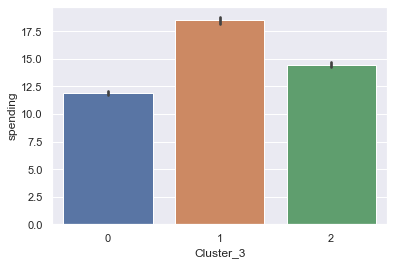

In [135]:
sns.barplot(bm_df["Cluster_3"],bm_df["spending"] );


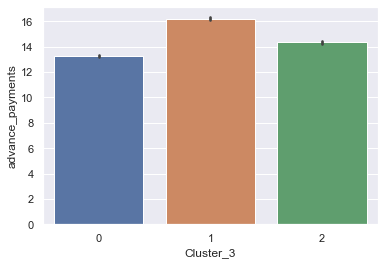

In [136]:
sns.barplot(bm_df["Cluster_3"],bm_df["advance_payments"] );

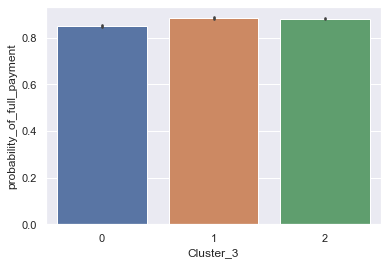

In [137]:
sns.barplot(bm_df["Cluster_3"],bm_df["probability_of_full_payment"] );


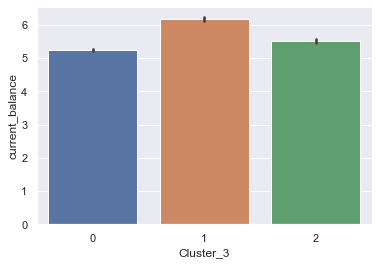

In [138]:
sns.barplot(bm_df["Cluster_3"],bm_df["current_balance"] );

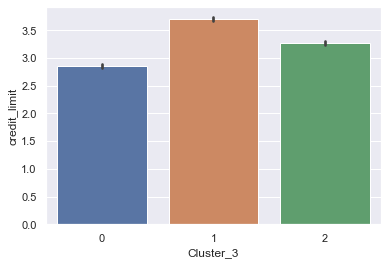

In [139]:
sns.barplot(bm_df["Cluster_3"],bm_df["credit_limit"] );

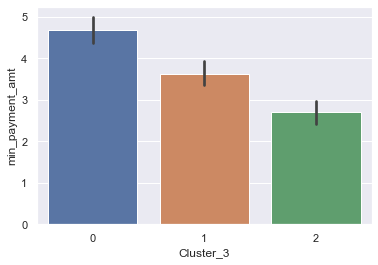

In [140]:
sns.barplot(bm_df["Cluster_3"],bm_df["min_payment_amt"] );


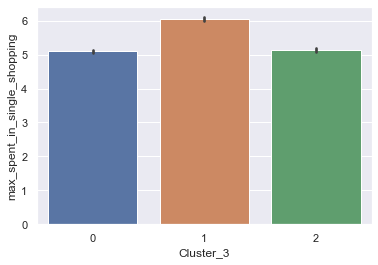

In [141]:
sns.barplot(bm_df["Cluster_3"],bm_df["max_spent_in_single_shopping"] );


<br />


## <font color = green > Obervation :- </font>

<br />
<br />



### `Spending` - Customers in cluster 1 spend more than customers in cluster 0 and 2. 


<br />
<br />
<br />
<br />

### `Advance_payments` - being made as well is the number is Higher in case of customers in Cluster 1 than for customers in Cluster 0 and 2.  This is a Good inidication. 

<br />
<br />
<br />
<br />


### `Probability_of_full_payment`  -  is High and at the same time it is similar for all the clusters. 

<br />
<br />
<br />
<br />


### `Current_balance` - is Highest for cluster 1. 

### Then comes Cluster 2 and  Cluster 0 whose Current balance levels are very similar. 


<br />
<br />
<br />
<br />


### `Credit_limit` -   is Highest for customers that belong to Cluster 1, which as we have checked from the previous Data is a very appropriate decison taken from the bank.

### This is because Cluster 1 has fared well in parameters like Advance payments and Probability of full payment.  

### What we are getting to see here is quite aligned increase and decrease. Like for Cluster 0 the Credit Limit is lesser than Cluster 1, the spending is also less, advance payment needed to be paid is also less and probability of full payment is also less.      


### We see a justified alignment amongst the paramters.

<br />
<br />
<br />
<br />


### `Min_payment_amt` - Cluster 0 is seen to have a High Minimum Payment, which indicates that people that belong to this cluster use the card most often for High Value payments to be made while shopping. 


### Cluster 1 has a Minimum Payment range between 3500- 4000. Cluster 2 has the lowest Minimum Payment range which lies between 2500-3000 Rupees.   

<br />
<br />
<br />
<br />


### `Max_spent_in_single_shopping` - is Highest for customers that belong to cluster 1.

### Cluster 0 and Cluster 2 have similar values of Max spent amount. 


<br />
<br />
<br />


### <center> Overall <center/>
    
### Having 3 clusters in my opinion helped us to get a different and new perpespective with respect to our customer base. 


### One aspect we were able to note is that Cluster 0 and Cluster 2 are very similar on a lot of parameters. 


### Keeping note of the above statement it would be advised to consider to 2 clusters for segmented promotional activities rather than 3 clusters. 


<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />


***

<br/>
<br/>

### Q) 1.5 Describe cluster profiles for the clusters defined. 

### Recommend different promotional strategies for different clusters.

<br/>
<br/>

### <font color = green > Answer :- </font>   I will recommend the promotional strategies based on 3 clusters. 

<br />
<br />


### Let, me first start by presenting a brief overview of the 3 clusters and then give the promotional strategies for each cluster based on the Data Analysis we have performed. 


<br />
<br />

### <center> Cluster 1 <center/>
    
<br />
<br />

They comprise of customers that spend a High amount on an average every month via their Credit Cards.

<br />
<br />

For our customer-base Advance Cash payment for Cluster 1 is High, this brings in a sense of security from the prepespective of the bank that although the spending is on the Higher side the Credited amount is being paid back consistently. 
<br />
<br />

High Probability of full payment again is an indicator of security for the bank and it also validates the effort to provide more promotional offers to these customers. 

<br />
<br />

If the customer spends a Higher amount since the probability is High it is Highly likely that the repayment will be done to the bank. 

<br />
<br />


Current balance can be viewed upon as an un-utilized resource that is available to the customers. Promotions are to foster the utilization of this very resource(Credit Balance).


<br />
<br />

Clsuter 1 has High Credit Limit as well. 

<br />
<br />



Viewing Minimum and Maximum spent in a single shopping it can be assumed that customers in cluster 1 use their Credit card quite often while making their monthly purchases.       
   

<br />
<br />


### <center> Cluster 2   <center/> 

<br />
<br />

Cluster 2 comprises of customers that on an average spend close to 10 -to- 12  thousand monthly via their Credit Cards. 


<br />
<br />

Average Advance payments being made considering their monthly expense is quite on track or in other words is good. 


<br />
<br />

Probability of payment for this group is less compared to Cluster 1 which is something to be a little carefull about for Clsuter 2 customers. 


<br />
<br />

What is we provide good promotional offers and they indulge themselves in it and are later not able to repay on time or have some other issues. 


<br />
<br />

It is important to keep note of customers which have low Probability of full payment values. 

<br />
<br />


Current Balance for Cluster 2 is around 5 thousand which is quite close to the average montly expense being made by this group. 

<br />
<br />


Available balance indicates that there is room for more purchase that is possible for the customers of this group. 


<br />
<br />

Although between Cluster 1 and Cluster 2 the monthly Credit limit difference is just 5 thousand. There is stark difference between customers of both the clusters. 


<br />
<br />

Minimum payent for which Credit Card is used is close to 3.5 thousand. Max amount on average for which Credit Card is used is close to 5 thousand.      


<br />
<br />

<br />
<br />

<br />
<br />





## <center> Promotional strategies <center/> 

<br/>

### <center> Cluster 1 <center/>

<br />
<br />

Customers of this Cluster are frequent Credit Card users. Spending pattern suggests that they use the Card for low value purchase and for High value purchase quite generously. Since we understand this it is advised that we can follow on the below provided recommendations for best results : - 


<br />
<br />



1. This group it is best to provide a variety of offers using their Credit Cards. 

<br />
<br />

2. The focus range for attractive offers should in the range of 3 thousand to 6 thousand. It can vary to a little lower and little higher as well. 

<br />
<br />

3. Probability of full payment is good so more attractive offers and rewards can be offered. 

<br />
<br />

4. We can understand based on buying pattern as to what the customer is spending more money, like on resturants or on shopping clothes or on gadgets and target the offers based on the customers buying history. 

<br />
<br />


<br />
<br />




### <center> Cluster 2 <center/>

<br />
<br />

Customers of this Cluster use their Credit Card less often and more cautiously. Spending pattern suggests that they use the Card for High value purchase which is close to 3 thousand or higher in value. Since we understand this it is advised that we can follow on the below provided recommendations for best results : - 


<br />
<br />

1. People of this cluster have a specific range where in they would use their Credit Card. This is in instances of 3 thousand and higher.   


<br />
<br />

2. There is always a limit to the attention that one can get from the customer. Therefore, for the best results for customers of Cluster 2 it is best to focus on the range of 3 thousand and above and make it available for the customers. 


<br />
<br />


3. Further personalizing is always suited. Customers tend to have a buying or usuage pattern wherein they use their Credit Card most often. Targeting offers in that domain(shopping, resturants, electronic gadgets) which are in the range of 3 thousand and above would lead to maximum Credit utilization. 

<br />
<br />

<br />
<br />




## <center> Thank You for reviewing the report. <center/> 